# 4. Exploratory Data Analaysis
---

### Introduction

The main objective of this Exploratory Data Analysis is to obtain information that can led the ML team to answers in order to predict a possible outcome of future cs-go matches. The hypotesis of the ML team is the following: ***It is possible to predict a cs-go match outcome by the information about the players.***

The dataset used for this EDA is player_match_data.csv, which is a combination from the originals match_players.csv and match_results.csv. and was done through SQL queries as part of the proyect requirements. The resultant dataset provides information of every match from 2012 to 2017 from a player's perspective. 

However, before starting the analysis, there are two main issues that must be corrected in order to continue. 
1. **There is no target variable**. Each row provides information about the player's performance in a match but there is no information about the outcome of the player.
2. **The player is not connected to a team**. Each row has the player id and the team name. Moreover, it has also the teams ids and scores. However, it falied to connect the team name provided with any of the team ids present, so with the given information it is impossible to know if the player has won or lost the match. 

In order to solve this problems and continue with the EDA analysis, the following variables will be created:

1. **player_team_id**. This will be a id-variable that will bring the team id using the team name. Since it was not possible to take the team_id from another source because the names have small changes, it was decided to create a custom formula that iterates in all the matches played by a team and takes the most repeated team id as the team's id (reading both team 1 id and team 2 id).

2. **winning team**. A categorical variable called 'winning_team' and consists in a number (0, 1 or 2). This variable will calculate the diference between team_1_score and team_2_score and will return the winner of the match.
    - 0 means draw,
    - 1 means that team 1 has won the match,
    - 2 means that team 2 has won the match.

    This variable will be analyized as a possible target variable. 

3. **winning_team_id**. This will be a id-variable that simply returns the winning team id. It uses the winning team outcome and returns the ID of one of both teams, or 0 if the match resulted in a draw. This variable will be only used to support the target variable.

4. **player has won**. A categorical target variable that provides 1 or 0 depending whether the player was part of the winning team or not. This will be calculated using the player_team_id and winning_team_id. If they are the same, it will return a 1. This means that both defeats and draws will be counted as 0. 

### 4.0. Importing libraries & dataset and creating variables

***Importing Libraries and dataset***

In [76]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
total_data = pd.read_csv('..\data\interim\player_match_data.csv')

Next, a small overview of the dataset:

In [77]:
total_data.head(5)

,adr,assists,deaths,fkdiff,hs,kdratio,kills,match_id,player_id,rating,...,team_2_id,team_2_score,team_name,map,hour,day,week,month,year,weekday
0,163.2,3,10,1,10,90.0%,32,32227,5736,2.44,...,6621,16,g3x,Train,13,2,26,7,2016,5
1,81.0,3,6,1,5,75.0%,17,32227,2532,1.55,...,6621,16,g3x,Train,13,2,26,7,2016,5
2,77.6,3,10,1,11,75.0%,16,32227,7382,1.41,...,6621,16,g3x,Train,13,2,26,7,2016,5
3,77.0,2,10,-1,6,85.0%,14,32227,5698,1.38,...,6621,16,g3x,Train,13,2,26,7,2016,5
4,61.2,4,12,4,4,85.0%,10,32227,10563,1.16,...,6621,16,g3x,Train,13,2,26,7,2016,5


***Creating variables***

In [82]:
    # Variable 1: player_team_id 

# 'player_team_id' function
def find_most_common_team_number(group):
        all_team_ids = pd.concat([group['team_1_id'], group['team_2_id']])
        team_numbers = all_team_ids.dropna().astype(int)
        most_common_team_number = np.argmax(np.bincount(team_numbers))
        return most_common_team_number

# Applying function to dataset
total_data['player_team_id'] = total_data.groupby('team_name').apply(find_most_common_team_number).reindex(total_data['team_name']).values

# ----------------------------------------------------------------------------------------------------------------------------

    # Variable 2: winning_team

# 'winning_team' function
def get_winning_team(team_1_score, team_2_score):
        if team_1_score == team_2_score: return 0
        elif team_1_score > team_2_score: return 1
        else: return 2

# Aapplying function to dataset
total_data['winning_team'] = total_data.apply(lambda row: get_winning_team(row['team_1_score'], row['team_2_score']), axis=1)

# ----------------------------------------------------------------------------------------------------------------------------

    # Variable 3: winning_team_id 

# Creating column called 'winning_team_id' (doesn't need function)
total_data['winning_team_id'] = np.where(total_data['winning_team'] == 1, total_data['team_1_id'],
                                np.where(total_data['winning_team'] == 2, total_data['team_2_id'], 0))

# ----------------------------------------------------------------------------------------------------------------------------

    # Variable 4: player_has_won 

# Creating column called 'player_has_won' (doesn't need function)
total_data['player_has_won'] = np.where(total_data['winning_team_id'] == total_data['player_team_id'], 1, 0)

# ----------------------------------------------------------------------------------------------------------------------------

    # Seleccting target variables

target_1 = 'winning_team'
target_2 = 'player_has_won'

# Show small overview of the dataset
total_data.head(5)


,adr,assists,deaths,fkdiff,hs,kdratio,kills,match_id,player_id,rating,...,hour,day,week,month,year,weekday,player_team_id,winning_team,winning_team_id,player_has_won
0,163.2,3,10,1,10,90.0%,32,32227,5736,2.44,...,13,2,26,7,2016,5,6621,2,6621,1
1,81.0,3,6,1,5,75.0%,17,32227,2532,1.55,...,13,2,26,7,2016,5,6621,2,6621,1
2,77.6,3,10,1,11,75.0%,16,32227,7382,1.41,...,13,2,26,7,2016,5,6621,2,6621,1
3,77.0,2,10,-1,6,85.0%,14,32227,5698,1.38,...,13,2,26,7,2016,5,6621,2,6621,1
4,61.2,4,12,4,4,85.0%,10,32227,10563,1.16,...,13,2,26,7,2016,5,6621,2,6621,1


After the four variables were created, it is possible to begin with the EDA analysis

---

### 4.1. Data description

In [52]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946025 entries, 0 to 946024
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   adr              946025 non-null  object 
 1   assists          946025 non-null  int64  
 2   deaths           946025 non-null  int64  
 3   fkdiff           946025 non-null  int64  
 4   hs               946025 non-null  int64  
 5   kdratio          946025 non-null  object 
 6   kills            946025 non-null  int64  
 7   match_id         946025 non-null  int64  
 8   player_id        946025 non-null  int64  
 9   rating           946025 non-null  float64
 10  data_unix        946025 non-null  int64  
 11  team_1_id        946025 non-null  int64  
 12  team_1_score     946025 non-null  int64  
 13  team_2_id        946025 non-null  int64  
 14  team_2_score     946025 non-null  int64  
 15  team_name        946025 non-null  object 
 16  map              946025 non-null  obje

WRITE CONLCUSIONS

### 4.2. Null values

the following columns are listed as 'object' and may contain invalid values: adr, kdratio, map

In [53]:
# Convert'adr' and 'kdratio' to numeric columns
total_data['adr'] = pd.to_numeric(total_data['adr'], errors='coerce')
total_data['kdratio'] = pd.to_numeric(total_data['kdratio'].str.rstrip('%'), errors='coerce') / 100.0

In [54]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946025 entries, 0 to 946024
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   adr              815862 non-null  float64
 1   assists          946025 non-null  int64  
 2   deaths           946025 non-null  int64  
 3   fkdiff           946025 non-null  int64  
 4   hs               946025 non-null  int64  
 5   kdratio          815988 non-null  float64
 6   kills            946025 non-null  int64  
 7   match_id         946025 non-null  int64  
 8   player_id        946025 non-null  int64  
 9   rating           946025 non-null  float64
 10  data_unix        946025 non-null  int64  
 11  team_1_id        946025 non-null  int64  
 12  team_1_score     946025 non-null  int64  
 13  team_2_id        946025 non-null  int64  
 14  team_2_score     946025 non-null  int64  
 15  team_name        946025 non-null  object 
 16  map              946025 non-null  obje

After the replacement and data type conversion:
- Column 'adr' has 130.163 null values, a 13.758% of the total entries.
- Column 'kdratio' has 130.037 null values, a 13.745% of the total entries.

In [55]:
total_data['map'].unique()

array(['Train', 'Dust2', 'Dust2_se', 'Cache', 'Mirage', 'Nuke', 'Inferno',
       'Cobblestone', 'Vertigo', 'Overpass', 'Nuke_se', 'Inferno_se',
       'Mirage_ce', 'Train_se', 'Season', 'Mill_ce', 'Tuscan', 'Ancient',
       'Dust_se', 'Train_ve'], dtype=object)

Map has no wrong values.

Next, since the variables 'adr' and 'kdratio' are numeric and both count with a normal distribution, the replacement of the null entries will follow this criteria:
- First, a player's 'adr' or 'kdratio' will be filled with the player's mean of them.
- Second, if there is no info to fill the nan, the general mean will be used to fill the remanent rows.


In [56]:
# Group by 'player_id' and fill NaN values in each player's 'adr' column with the mean of non-null values for that player
total_data['adr'] = total_data.groupby('player_id')['adr'].transform(lambda x: x.fillna(x[x.notna()].mean()))
total_data['kdratio'] = total_data.groupby('player_id')['kdratio'].transform(lambda x: x.fillna(x[x.notna()].mean()))

In [57]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946025 entries, 0 to 946024
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   adr              930980 non-null  float64
 1   assists          946025 non-null  int64  
 2   deaths           946025 non-null  int64  
 3   fkdiff           946025 non-null  int64  
 4   hs               946025 non-null  int64  
 5   kdratio          931002 non-null  float64
 6   kills            946025 non-null  int64  
 7   match_id         946025 non-null  int64  
 8   player_id        946025 non-null  int64  
 9   rating           946025 non-null  float64
 10  data_unix        946025 non-null  int64  
 11  team_1_id        946025 non-null  int64  
 12  team_1_score     946025 non-null  int64  
 13  team_2_id        946025 non-null  int64  
 14  team_2_score     946025 non-null  int64  
 15  team_name        946025 non-null  object 
 16  map              946025 non-null  obje

After the replacement, 'adr' and 'kdratio' still have null values (15.045 and 15.023 respectively).

The rest of rows with null values will be deleted. This means a 1.59% of the dataset.

In [58]:
# Saving a copy of the rows with null values
null_rows = total_data.loc[total_data.isnull().any(axis=1)]
# Deleting rows with null values
total_data = total_data.dropna()
total_data.shape

(930980, 27)

After deleting all the null values, the total length of the dataset is 930.980 rows.

4.3. Plotting numeric-numeric variables vs both targets

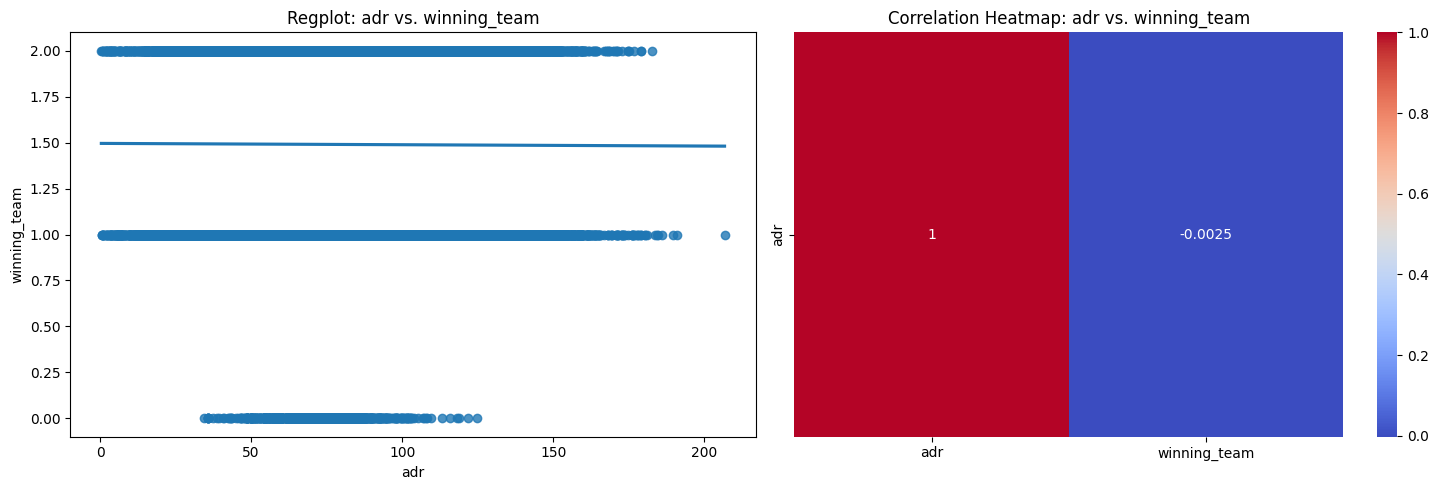

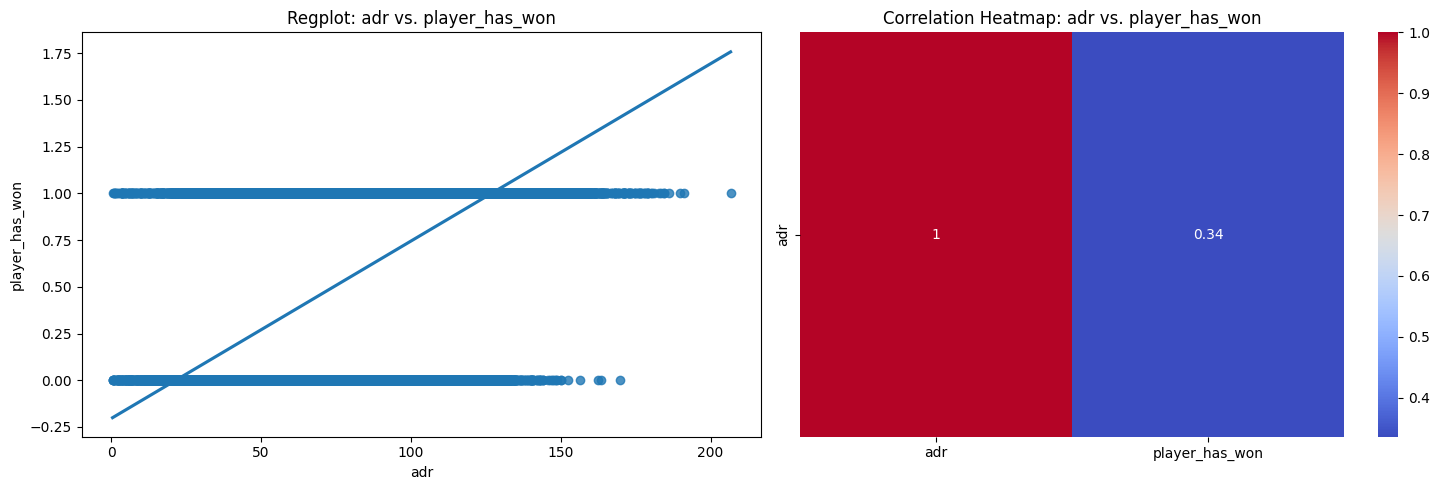

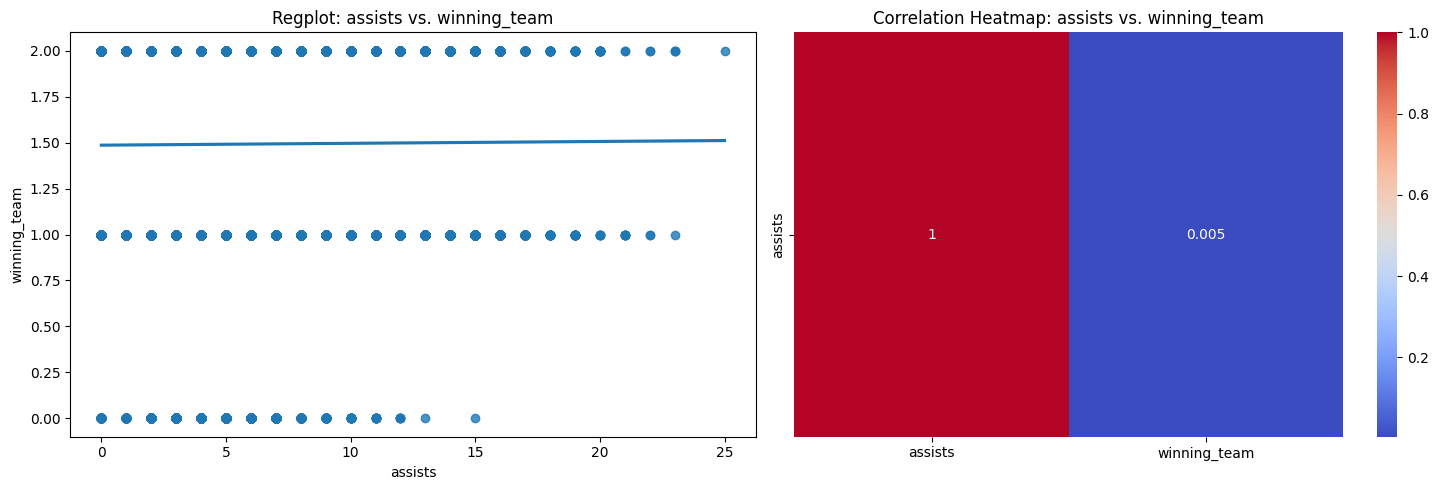

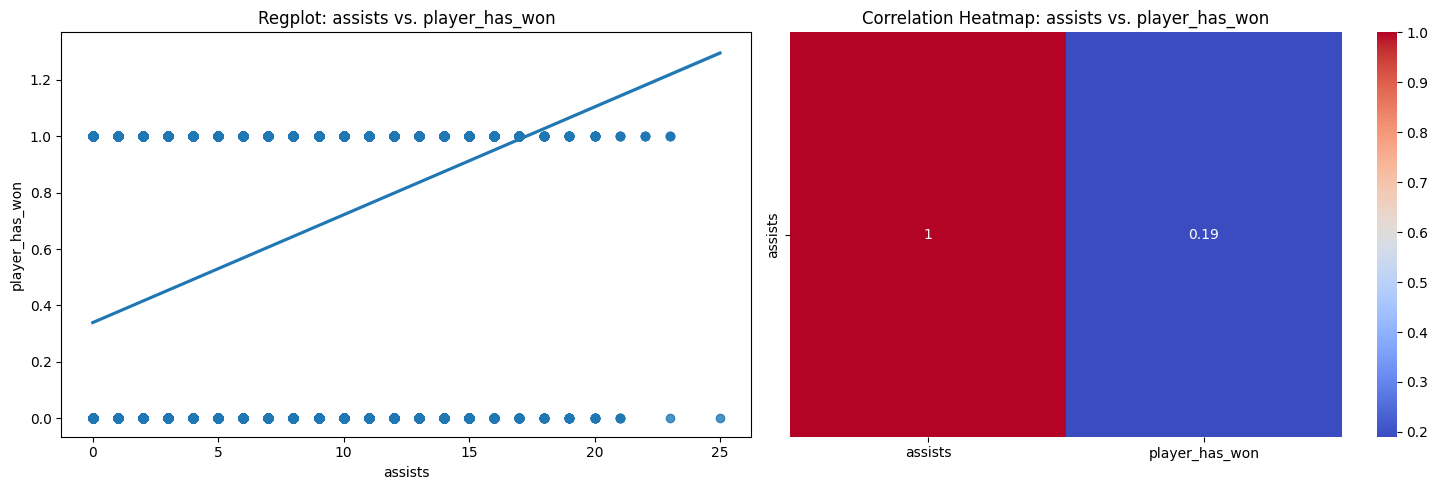

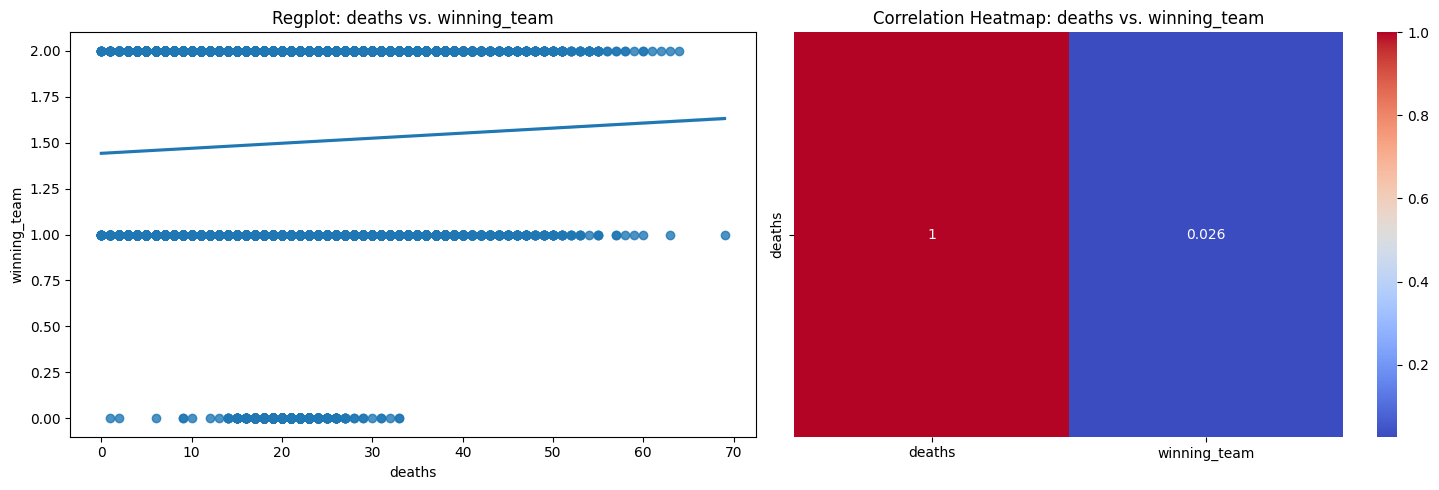

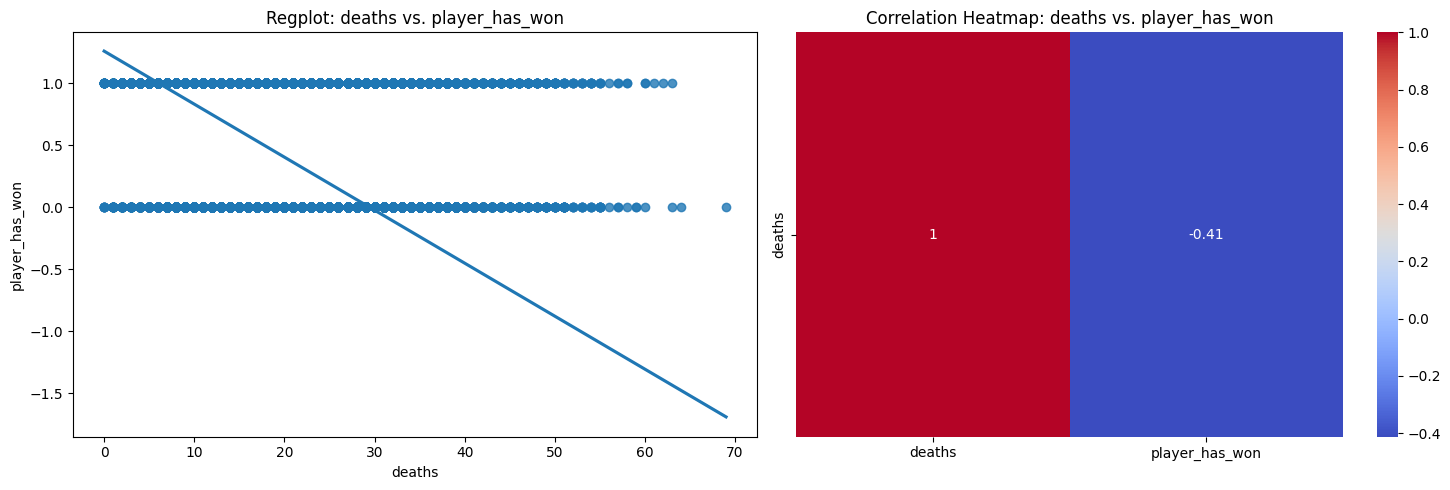

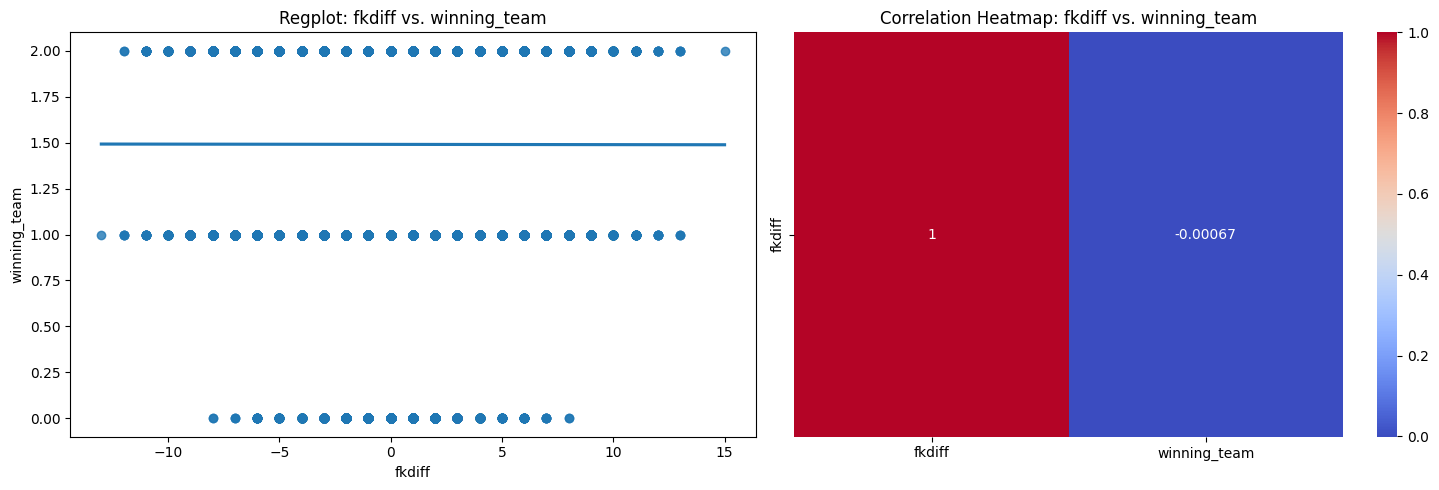

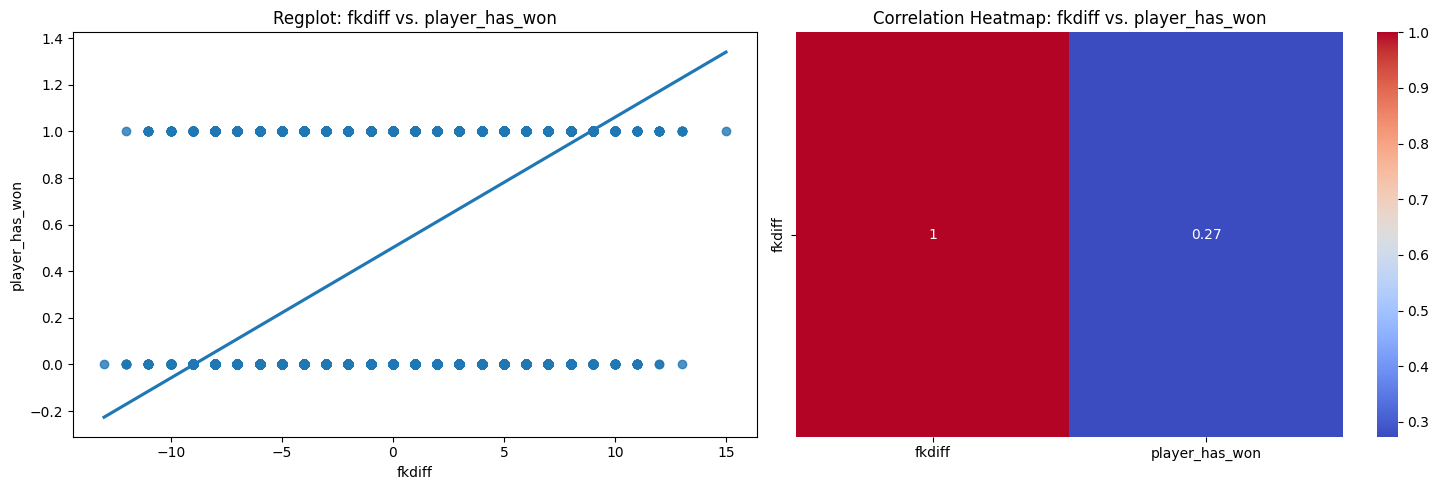

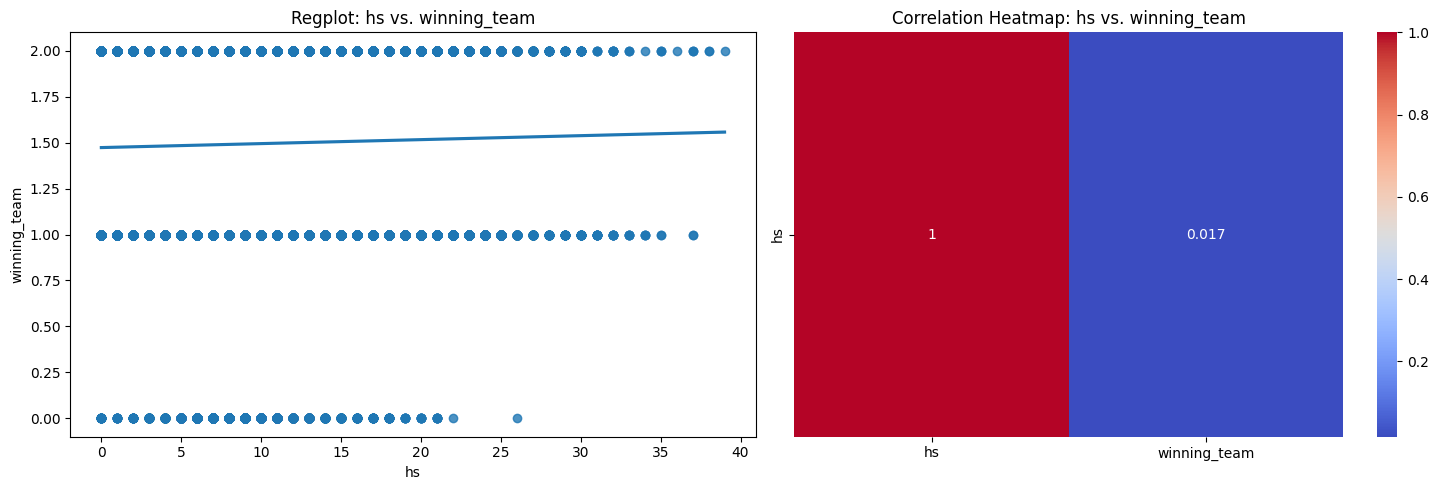

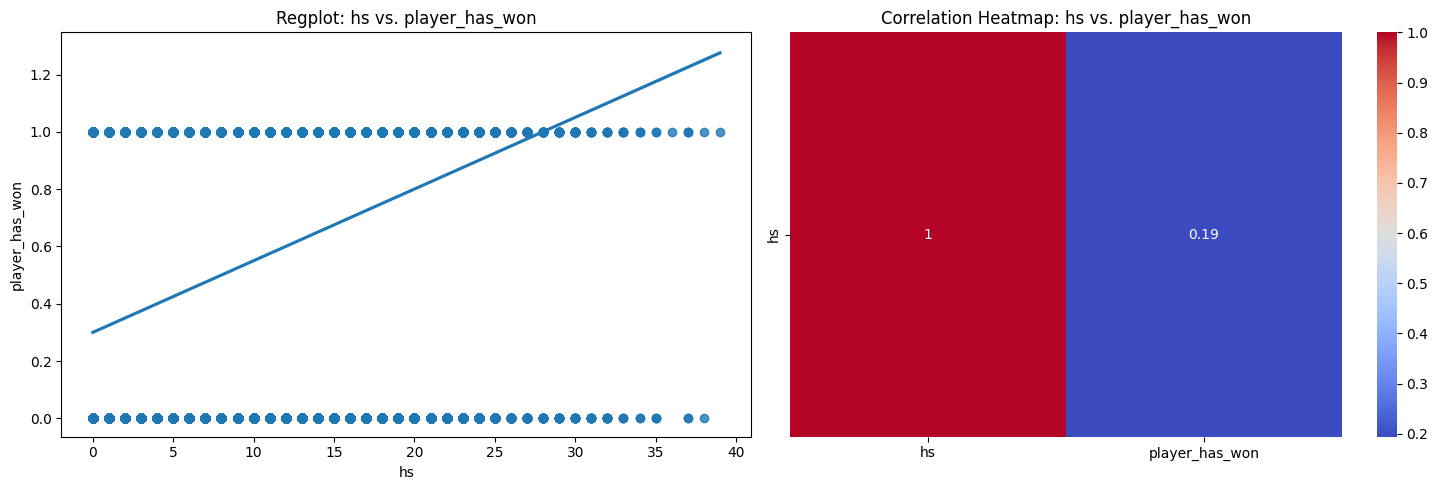

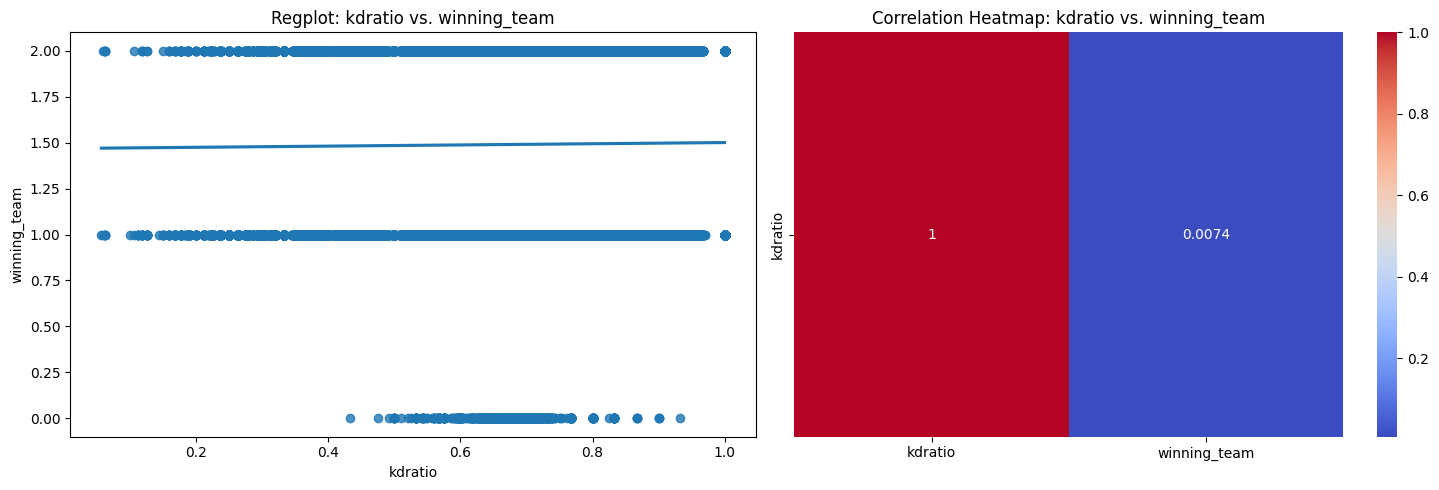

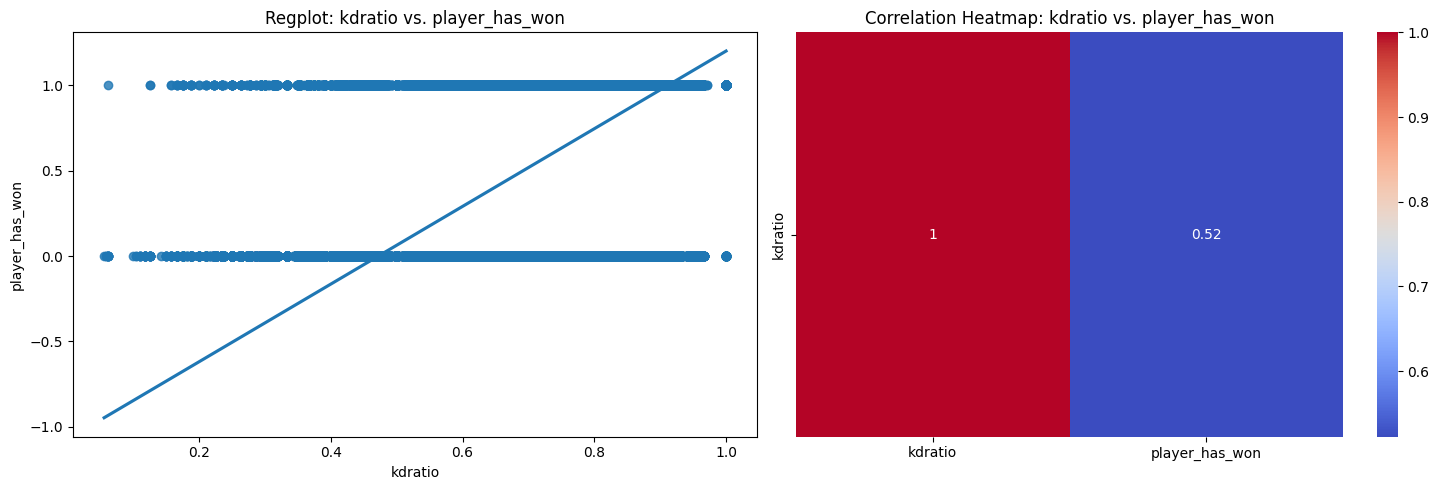

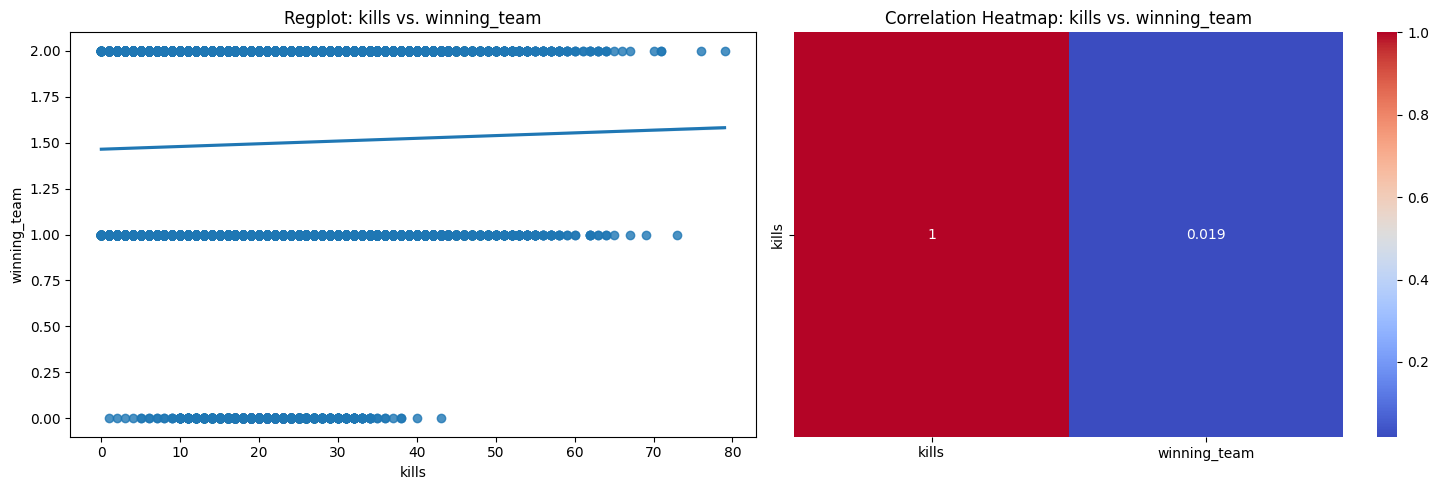

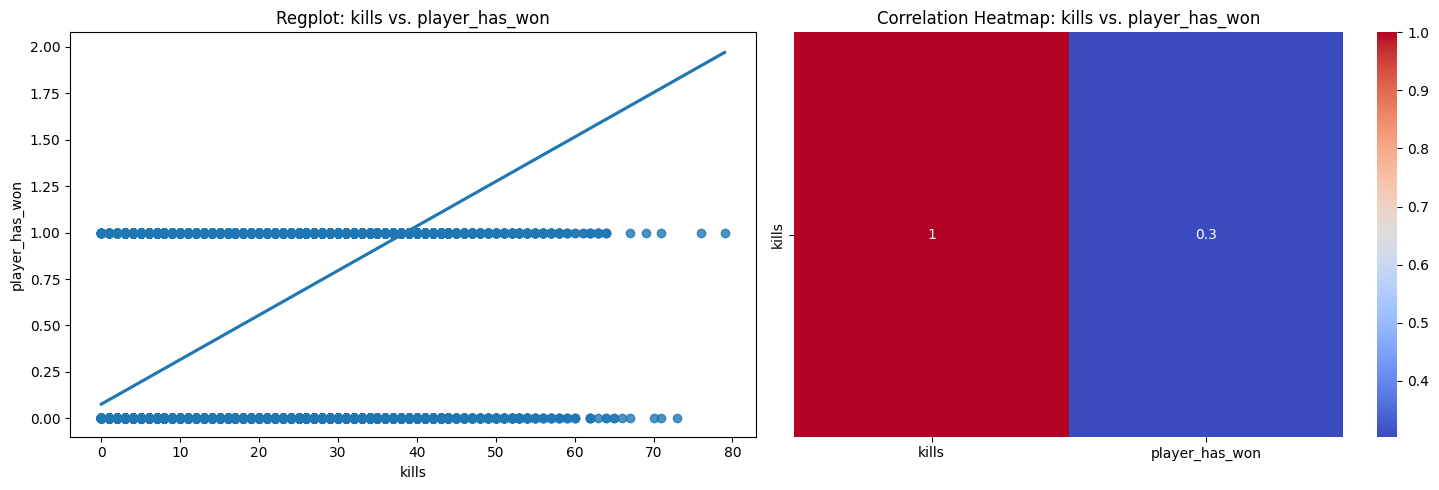

In [61]:
numeric_variables = ['adr', 'assists', 'deaths', 'fkdiff', 'hs', 'kdratio', 'kills']

for column in numeric_variables:
    # Setting up the subplots for target_1
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Regression plot for target_1
    sns.regplot(x=column, y=target_1, data=total_data, ax=axes[0])
    axes[0].set_title('Regplot: {} vs. {}'.format(column, target_1))

    # Heatmap of correlation for target_1
    sns.heatmap(total_data[[column, target_1]].corr().iloc[0:1, :], annot=True, cmap='coolwarm', ax=axes[1])
    axes[1].set_title('Correlation Heatmap: {} vs. {}'.format(column, target_1))

    # Show the plot for each column with target_1
    plt.tight_layout()
    plt.show()

    # Setting up the subplots for target_2
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Regression plot for target_2
    sns.regplot(x=column, y=target_2, data=total_data, ax=axes[0])
    axes[0].set_title('Regplot: {} vs. {}'.format(column, target_2))

    # Heatmap of correlation for target_2
    sns.heatmap(total_data[[column, target_2]].corr().iloc[0:1, :], annot=True, cmap='coolwarm', ax=axes[1])
    axes[1].set_title('Correlation Heatmap: {} vs. {}'.format(column, target_2))

    # Show the plot for each column with target_2
    plt.tight_layout()
    plt.show()


After watching the numerical - numerical plots, it is possible to resume the information:

| Predictor | Corr with winning_team | Corr with player_has_won |
|-----------|-------------------------|---------------------------|
| adr       | -0.0025                 | 0.34                      |
| assists   | 0.005                   | 0.19                      |
| deaths    | 0.026                   | -0.41                     |
| fkdiff    | 0.00067                 | 0.27                      |
| hs        | 0.017                   | 0.19                      |
| kdratio   | 0.0074                  | 0.52                      |
| kills     | 0.019                   | 0.30                      |


It is important to state that the variable winning_team cannot be used as a target due to its low performance with other variables. Since 100% of the players have played as team 1 or team 2 during their career, this strongly affects the outcome of the variable. However, when the second path is taken and the variable player_has_won is analyized, the performance rise up to acceptable levels. This is a resume with the correlations: 

- **Kdratio** (0.52) and **deaths** (-0.41) have the strongest correlation.
- **adr** (0.34), **kills** (0.30) and **fkdiff** (0.27) has a good correlation.
- **assists** (0.19) and **hs** (0.19) have a poor correlation.

### 4.4. Plotting categorical - numerical analysis

To start, the only categorial variable that is has been not factorized yet is 'map'. The rest of the variables are already numbers. 

***Map factorization***

In [63]:
total_data['map_n'], unique_maps = pd.factorize(total_data['map'])

0         0
1         0
2         0
3         0
4         0
         ..
946020    9
946021    9
946022    9
946023    9
946024    9
Name: map_n, Length: 930980, dtype: int64

In [64]:
total_data.columns

Index(['adr', 'assists', 'deaths', 'fkdiff', 'hs', 'kdratio', 'kills',
       'match_id', 'player_id', 'rating', 'data_unix', 'team_1_id',
       'team_1_score', 'team_2_id', 'team_2_score', 'team_name', 'map', 'hour',
       'day', 'week', 'month', 'year', 'weekday', 'winning_team',
       'winning_team_id', 'player_team_id', 'player_has_won', 'map_n'],
      dtype='object')

***Plotting categorical - numerical analysis with factorized variables***

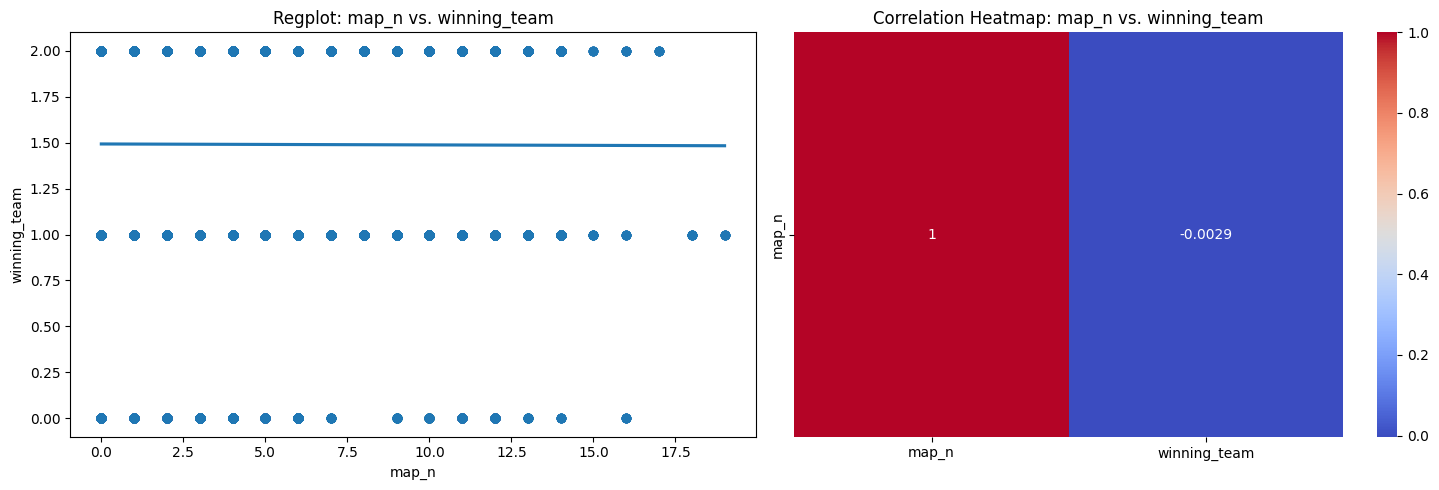

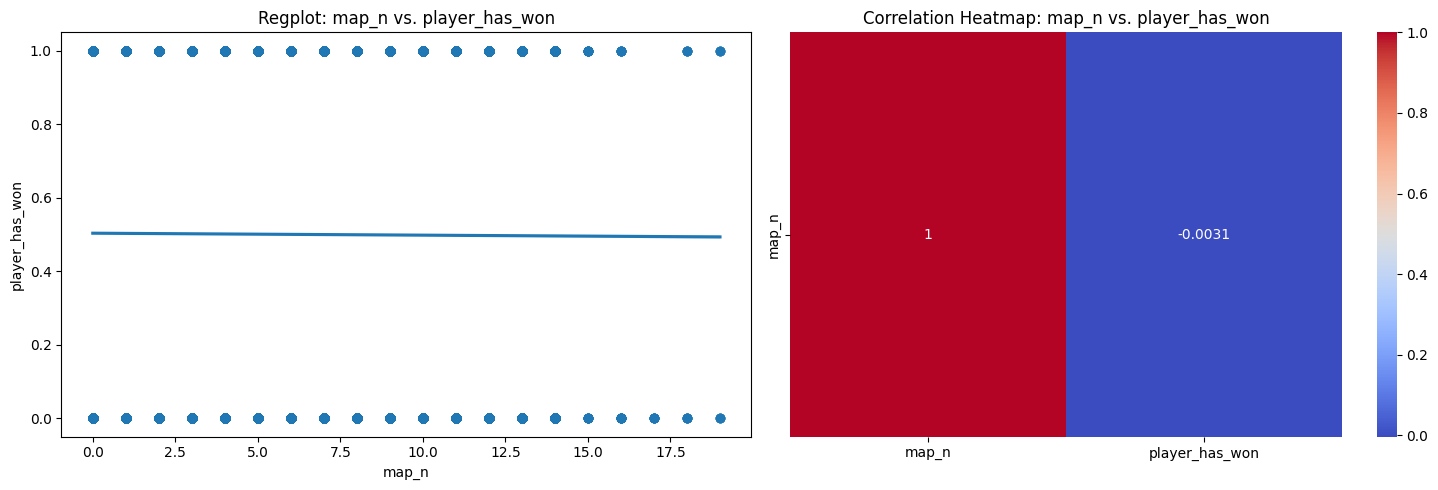

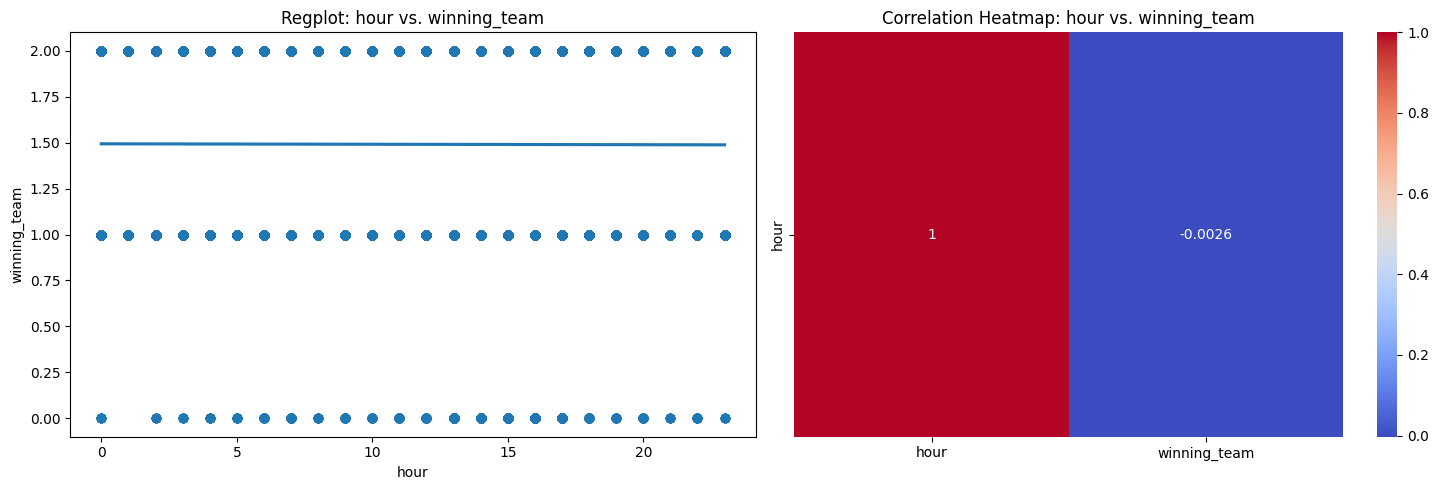

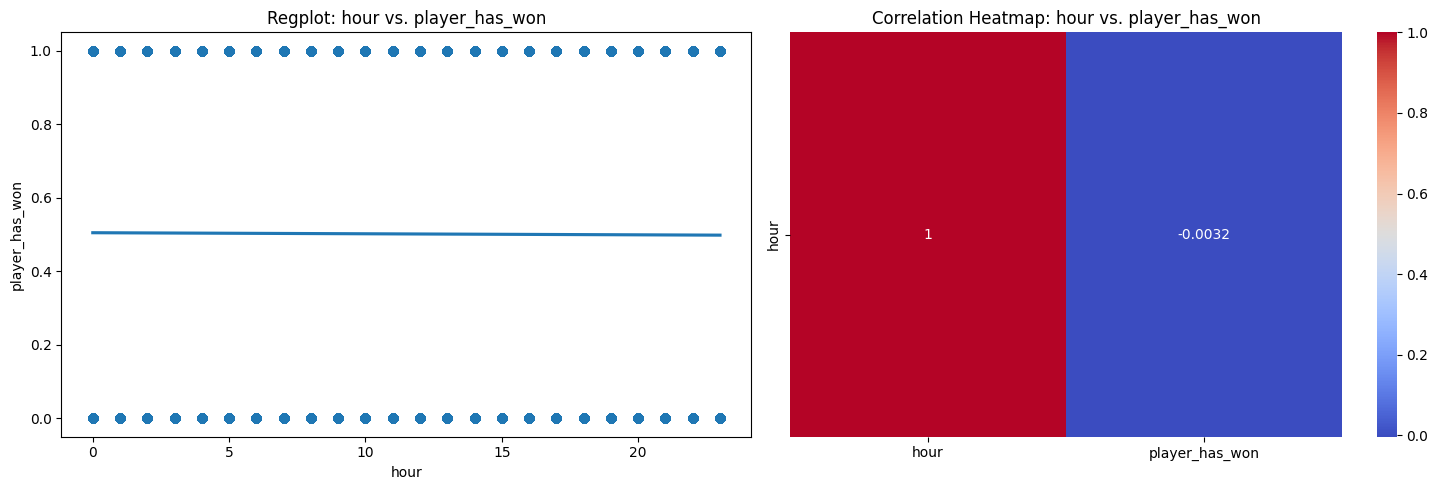

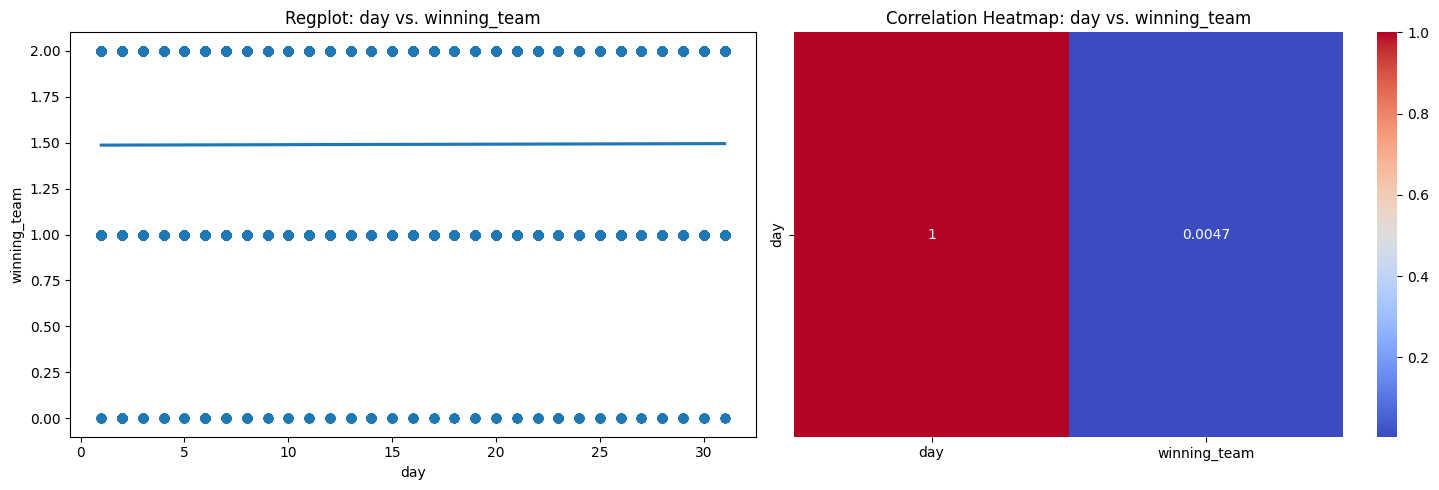

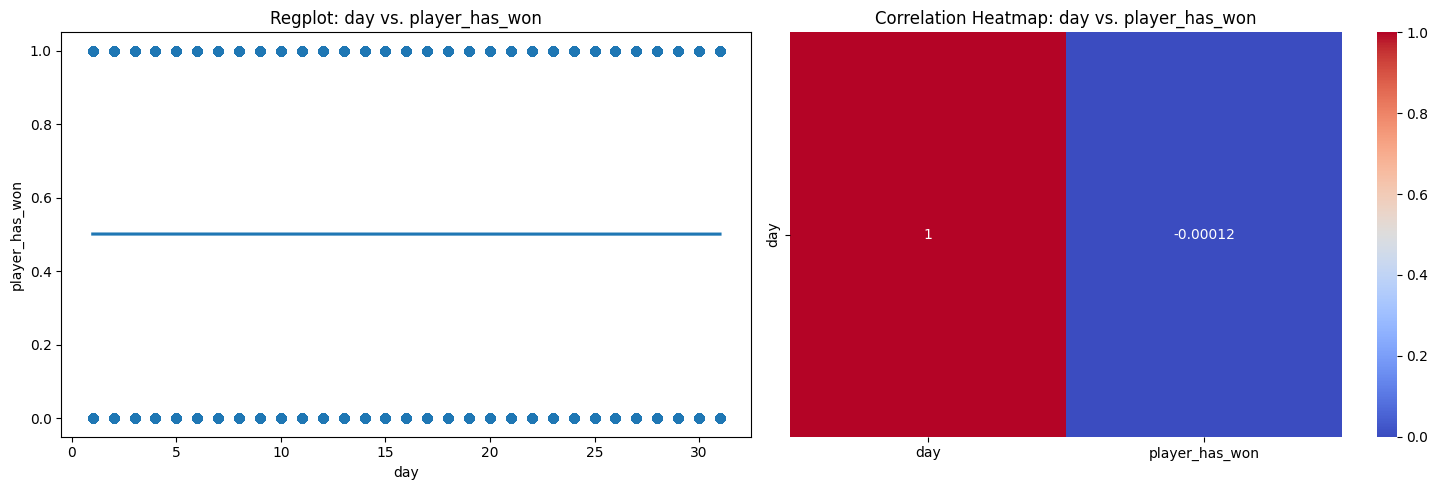

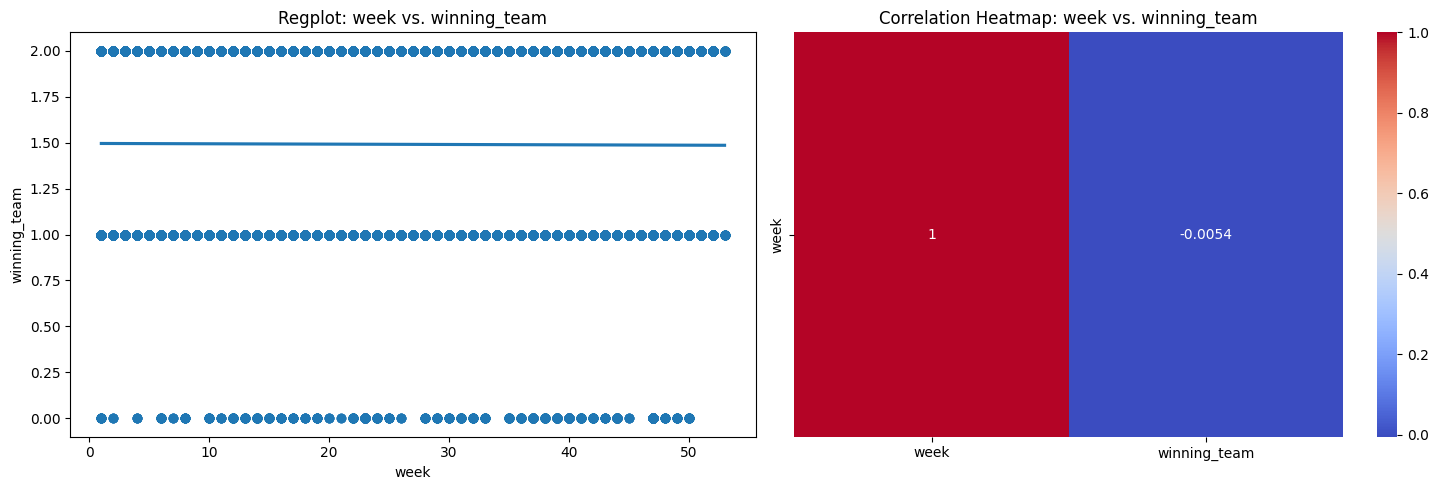

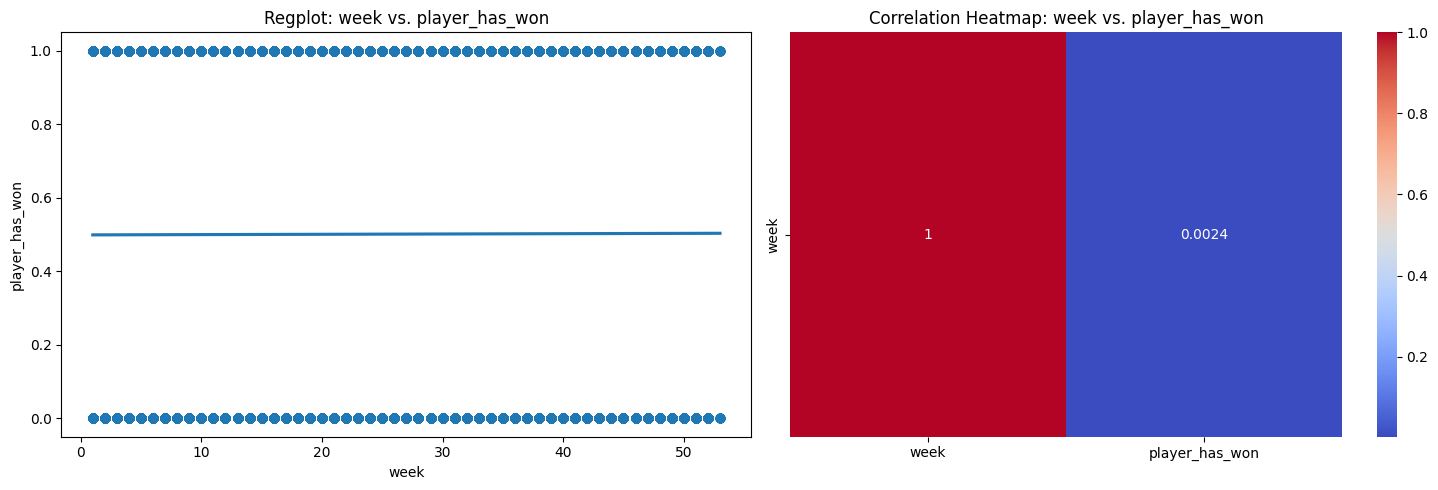

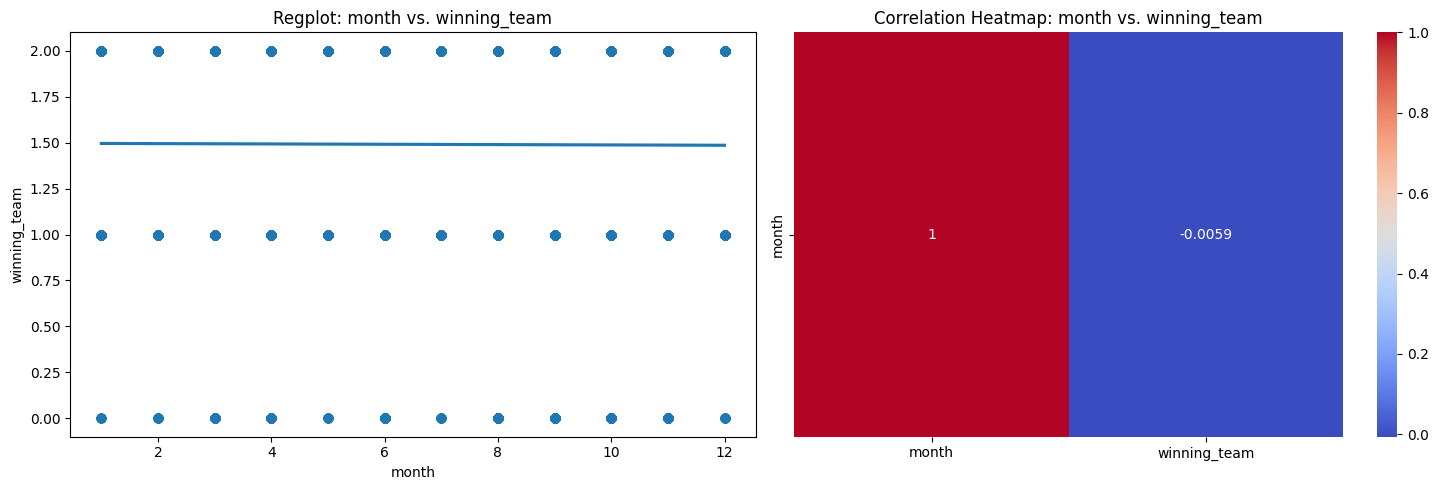

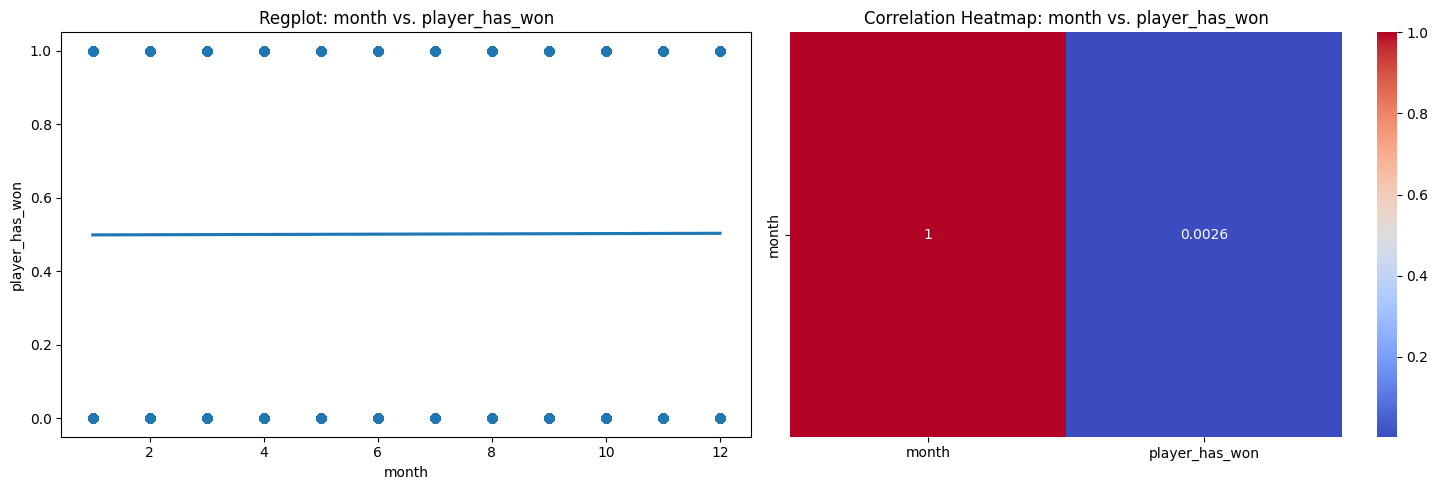

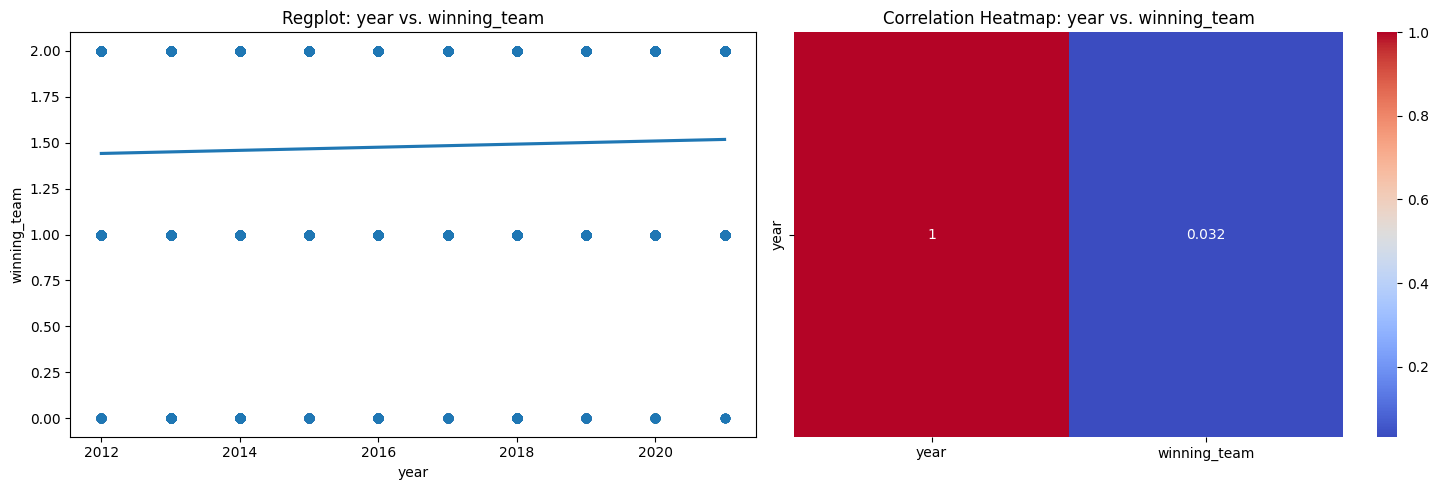

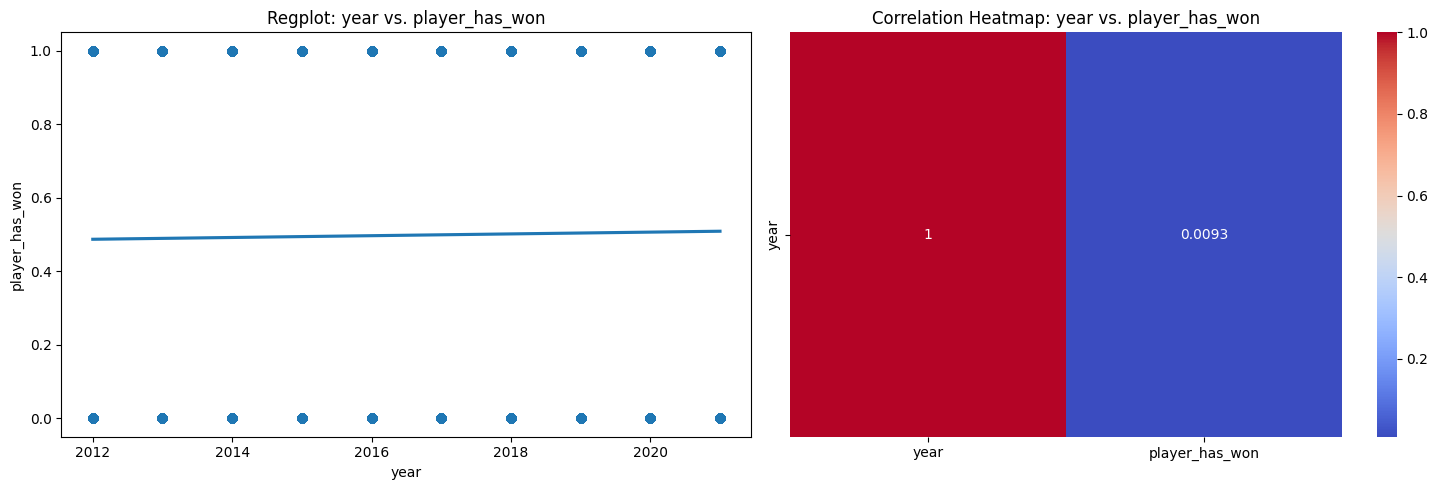

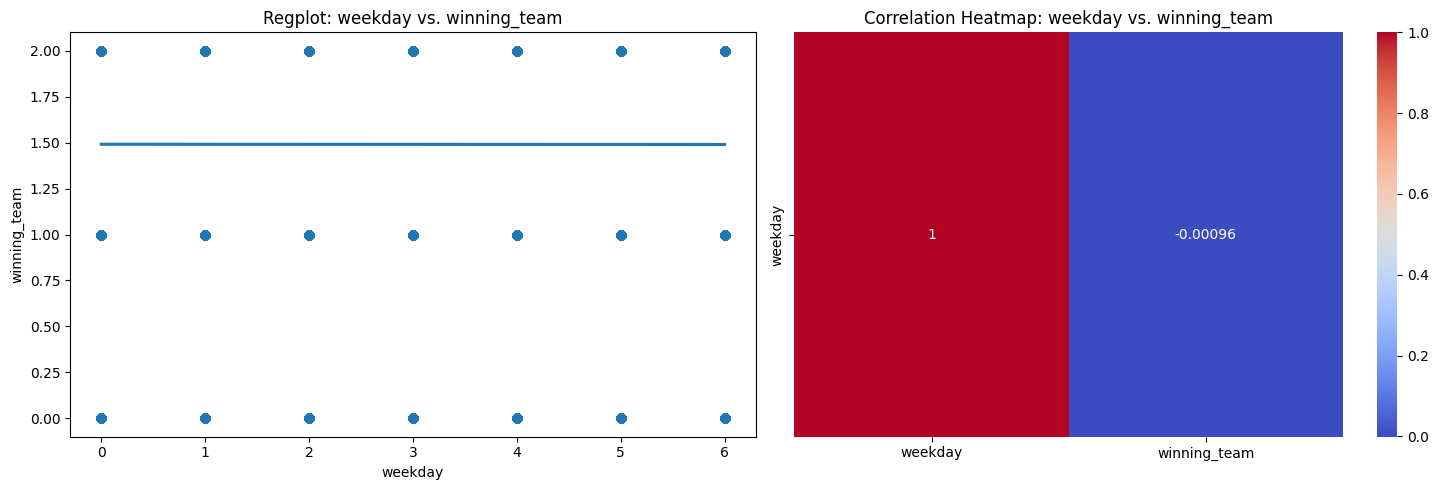

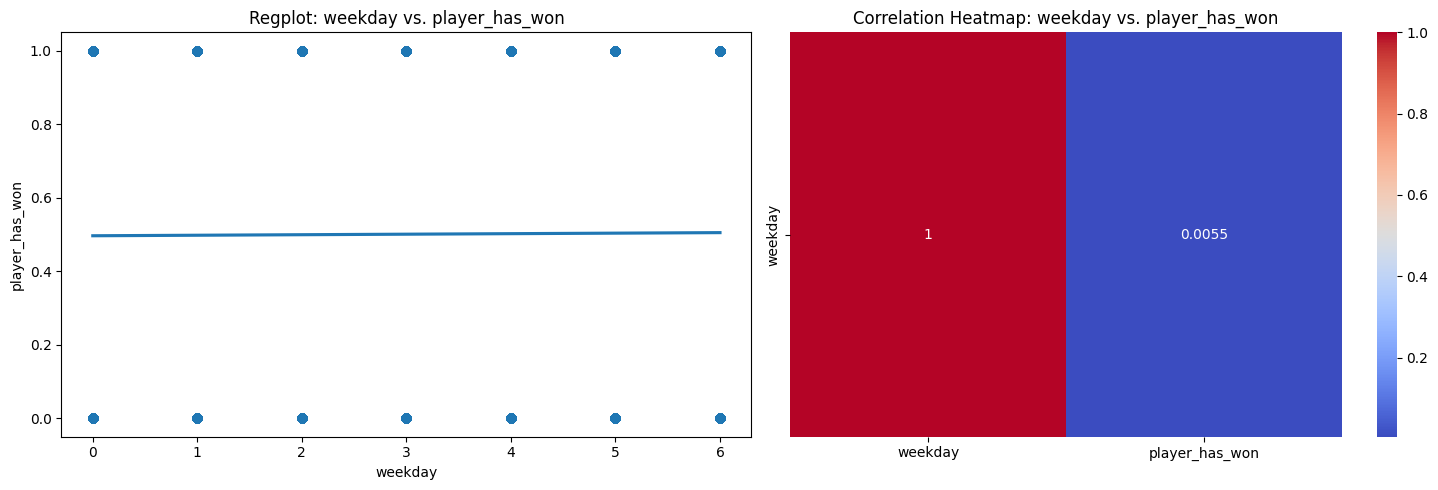

In [65]:
numeric_variables_2 = ['map_n', 'hour', 'day', 'week', 'month', 'year', 'weekday']

for column in numeric_variables_2:
    # Setting up the subplots for target_1
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Regression plot for target_1
    sns.regplot(x=column, y=target_1, data=total_data, ax=axes[0])
    axes[0].set_title('Regplot: {} vs. {}'.format(column, target_1))

    # Heatmap of correlation for target_1
    sns.heatmap(total_data[[column, target_1]].corr().iloc[0:1, :], annot=True, cmap='coolwarm', ax=axes[1])
    axes[1].set_title('Correlation Heatmap: {} vs. {}'.format(column, target_1))

    # Show the plot for each column with target_1
    plt.tight_layout()
    plt.show()

    # Setting up the subplots for target_2
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    # Regression plot for target_2
    sns.regplot(x=column, y=target_2, data=total_data, ax=axes[0])
    axes[0].set_title('Regplot: {} vs. {}'.format(column, target_2))

    # Heatmap of correlation for target_2
    sns.heatmap(total_data[[column, target_2]].corr().iloc[0:1, :], annot=True, cmap='coolwarm', ax=axes[1])
    axes[1].set_title('Correlation Heatmap: {} vs. {}'.format(column, target_2))

    # Show the plot for each column with target_2
    plt.tight_layout()
    plt.show()

After the plotting, it is possible to resume the info in a table: 

| Variable | Corr. with Winning Team | Corr. with Player Has Won |
|----------|-------------------------|---------------------------|
| map      | -0.0029                 | -0.0031                   |
| hour     | -0.0026                 | -0.0032                   |
| day      | 0.0047                  | -0.00012                  |
| week     | -0.0054                 | 0.0024                    |
| month    | -0.0059                 | 0.0026                    |
| year     | 0.032                   | 0.0093                    |
| weekday  | -0.00096                | 0.0055                    |

In both cases, the correlations with target are extremely low, meaning that they have almost no use in the analysis. In this case, the first target (winning_team) performed better than the second target. Nevertheless, due to the poor performance, they will be deleted from the EDA.

### 4.5. General heatmap 

The following chart is a general heatmap of the remain columns of the dataset. For the filter, only the columns with strong correlation will be used (the numeric ones). Moreover, columns that provide ids and player information will be deleted, since the model only works with numbers.

In [66]:
total_data.columns

Index(['adr', 'assists', 'deaths', 'fkdiff', 'hs', 'kdratio', 'kills',
       'match_id', 'player_id', 'rating', 'data_unix', 'team_1_id',
       'team_1_score', 'team_2_id', 'team_2_score', 'team_name', 'map', 'hour',
       'day', 'week', 'month', 'year', 'weekday', 'winning_team',
       'winning_team_id', 'player_team_id', 'player_has_won', 'map_n'],
      dtype='object')

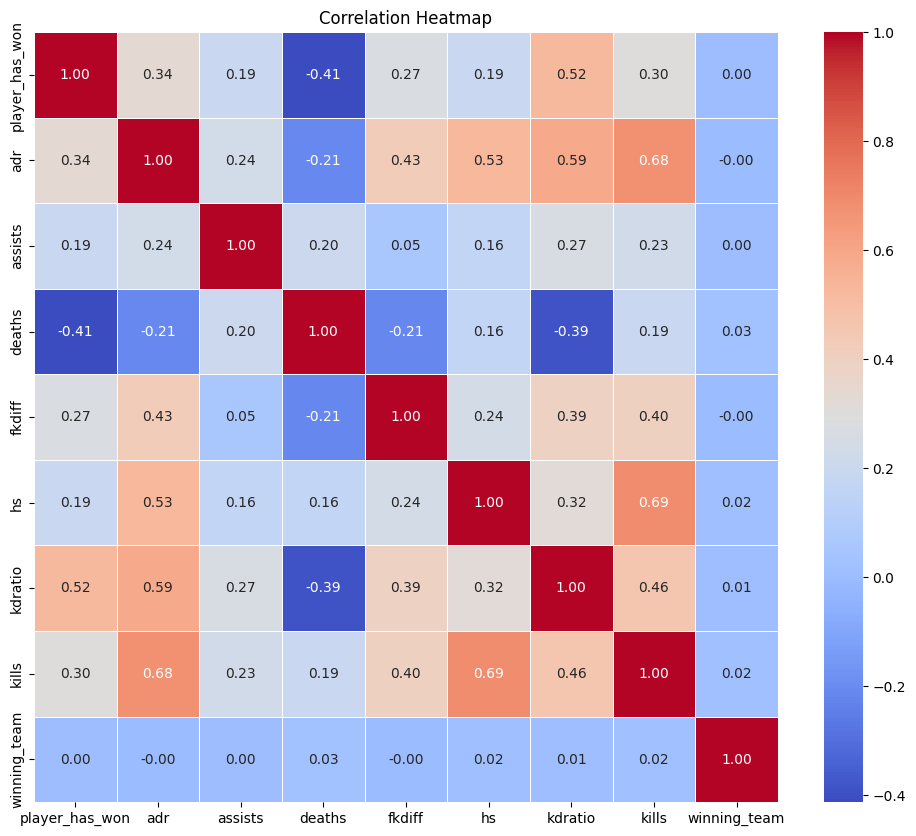

In [72]:
heatmap_data = total_data[['player_has_won', 
                 'adr', 
                 'assists', 
                 'deaths', 
                 'fkdiff', 
                 'hs', 
                 'kdratio', 
                 'kills',
                 'winning_team']]

correlation_matrix = heatmap_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap with Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

This plot shows that there are some strong correlations between variables in the dataset. For example, adr (average damage in round) and kills are also strong correlated variables. It is possible to state that, from the original dataset of 26 columns, the EDA found that only seven predictors are important to predict the posible outcome of a player in a cs-go match.

In [74]:
clean_total_data = total_data[['adr', 
                 'assists', 
                 'deaths', 
                 'fkdiff', 
                 'hs', 
                 'kdratio', 
                 'kills',
                'player_has_won']]

clean_total_data.head(10)

,adr,assists,deaths,fkdiff,hs,kdratio,kills,player_has_won
0,163.2,3,10,1,10,0.90,32,1
1,81.0,3,6,1,5,0.75,17,1
2,77.6,3,10,1,11,0.75,16,1
3,77.0,2,10,-1,6,0.85,14,1
4,61.2,4,12,4,4,0.85,10,1
5,67.8,2,16,-2,7,0.55,12,0
6,81.8,0,19,-2,6,0.50,13,0
7,77.7,1,20,1,5,0.55,12,0
8,43.0,0,17,-1,4,0.50,8,0
9,23.3,1,17,-2,2,0.25,3,0
